### <font color='red'> Buzz Prediction on Twitter

Project Description:
- Use same datasets as previous project.
- Run all the models only on 10% data. Use code given in previous project for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in previous project again on data you get from PCA. Compare your results with results in previous project. You don't need to apply all the models twice. Just copy the result table from previous project, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in previous project again on data you get from PCA. Compare your results with results in previous project. You don't need to apply all the models twice. Just copy the result table from previous project, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class


In [1]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

Saving Twitter-Absolute-Sigma-500.data to Twitter-Absolute-Sigma-500.data
User uploaded file "Twitter-Absolute-Sigma-500.data" with length 68184546 bytes


## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # b/w 0 & 1
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

C:\Users\mahee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Read data into dataframe

In [2]:

cols = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','BUZZ']
df = pd.read_csv('Twitter-Absolute-Sigma-500.data', header = None)
df.columns = cols

In [3]:
df.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [4]:
df.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


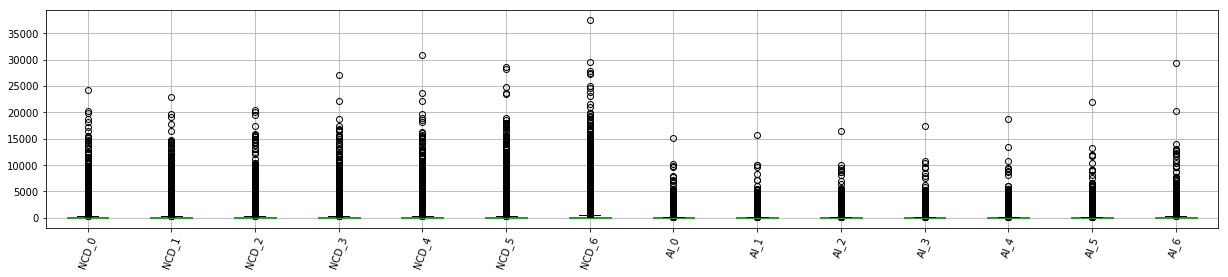

In [5]:
#exploring the data to check statistical dispersion
df.boxplot(column = cols[0:14], rot = 70, figsize= (21, 4))

In [6]:
### For 10% data
_, sample_data, _, sample_target = train_test_split(df.iloc[:, 0:-1], df.iloc[:, -1], random_state = 0, test_size = 0.1)
#X_train_1, X_test_1, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)

In [7]:

X_train_1, X_test_1, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train_mm = pd.DataFrame(scaler.fit_transform(X_train_1))
X_test_mm = pd.DataFrame(scaler.transform(X_test_1))
#X_train = X_train_mm
#X_test = X_test_mm
X_train_mm.shape

(11256, 77)

### No. of '1's and '0's reveal that that dataset is imbalanced

In [8]:
sample_target.value_counts()

0.0    11253
1.0     2818
Name: BUZZ, dtype: int64

## 1. Bagging & Pasting

### Bagging
* Bootstrap aggregating, also called bagging, is a machine learning ensemble algorithm. It also reduces variance and helps to avoid overfitting.
* It involves having each model in the ensemble vote with equal weight.

### Pasting
* In case of Pasting, the same process applies, only difference being that pasting doesn’t allow training instances to be sampled several times for the same predictors.

### Decision Tree - Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=4,random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_mm, y_train)

bag_tree_acc_train = bag_clf.score(X_train_mm, y_train)
bag_tree_acc_test = bag_clf.score(X_test_mm, y_test)
bag_tree_auc_train = roc_auc_score(y_train,bag_clf.predict(X_train_mm))
bag_tree_auc_test = roc_auc_score(y_test,bag_clf.predict(X_test_mm))

print('Decision Tree - Train score: %.2f'%bag_tree_acc_train)
print('Decision Tree - Test score: %.2f'%bag_tree_acc_train)
print('Decision Tree - Train roc_auc_score: %.2f'%bag_tree_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%bag_tree_auc_test)

Decision Tree - Train score: 0.96
Decision Tree - Test score: 0.96
Decision Tree - Train roc_auc_score: 0.94
Decision Tree - Test roc_auc_score: 0.9367106398 


### Decision Tree - Pasting

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=4,random_state=0)
pas_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

pas_clf.fit(X_train_mm, y_train)

pas_tree_acc_train = pas_clf.score(X_train_mm, y_train)
pas_tree_acc_test = pas_clf.score(X_test_mm, y_test)
pas_tree_auc_train = roc_auc_score(y_train,pas_clf.predict(X_train_mm))
pas_tree_auc_test = roc_auc_score(y_test,pas_clf.predict(X_test_mm))

print('Decision Tree - Train score: %.2f'%pas_tree_acc_train)
print('Decision Tree - Test score: %.2f'%pas_tree_acc_train)
print('Decision Tree - Train roc_auc_score: %.2f'%pas_tree_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%pas_tree_auc_test)

Decision Tree - Train score: 0.96
Decision Tree - Test score: 0.96
Decision Tree - Train roc_auc_score: 0.94
Decision Tree - Test roc_auc_score: 0.9364891068 


### KNN Classifier - Bagging

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier(n_neighbors=10)
bag_kn_clf = BaggingClassifier(kn_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
                               
bag_kn_clf.fit(X_train_mm, y_train)

bag_knn_acc_train = bag_kn_clf.score(X_train_mm, y_train)
bag_knn_acc_test = bag_kn_clf.score(X_test_mm, y_test)
bag_knn_auc_train = roc_auc_score(y_train,bag_kn_clf.predict(X_train_mm))
bag_knn_auc_test = roc_auc_score(y_test,bag_kn_clf.predict(X_test_mm))
print('## KNN Classifier - Bagging')
print('Decision Tree - Train score: %.2f'%bag_knn_acc_train)
print('Decision Tree - Test score: %.2f'%bag_knn_acc_train)
print('Decision Tree - Train roc_auc_score: %.2f'%bag_knn_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%bag_knn_auc_test)

## KNN Classifier - Bagging
Decision Tree - Train score: 0.95
Decision Tree - Test score: 0.95
Decision Tree - Train roc_auc_score: 0.89
Decision Tree - Test roc_auc_score: 0.8885053748 


### KNN Classifier - Pasting

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier(n_neighbors=10)
pas_kn_clf = BaggingClassifier(kn_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

pas_kn_clf.fit(X_train_mm, y_train)

pas_knn_acc_train = pas_kn_clf.score(X_train_mm, y_train)
pas_knn_acc_test = pas_kn_clf.score(X_test_mm, y_test)
pas_knn_auc_train = roc_auc_score(y_train,pas_kn_clf.predict(X_train_mm))
pas_knn_auc_test = roc_auc_score(y_test,pas_kn_clf.predict(X_test_mm))

print('## KNN Classifier - Pasting:')
print('Decision Tree - Train score: %.2f'%pas_knn_acc_train)
print('Decision Tree - Test score: %.2f'%pas_knn_acc_train)
print('Decision Tree - Train roc_auc_score: %.2f'%pas_knn_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%pas_knn_auc_test)

## KNN Classifier - Pasting:
Decision Tree - Train score: 0.95
Decision Tree - Test score: 0.95
Decision Tree - Train roc_auc_score: 0.89
Decision Tree - Test roc_auc_score: 0.8885053748 


## Adaboosting

* It focuses on classification problems and aims to convert a set of weak classifiers into a strong one.

### Decision Tree - Adaboosting

In [13]:
from sklearn.ensemble import AdaBoostClassifier

dt_clf = DecisionTreeClassifier(max_depth=4,random_state=0)
ada_dt_clf = AdaBoostClassifier(dt_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_dt_clf.fit(X_train_mm, y_train)

ada_tree_acc_train = ada_dt_clf.score(X_train_mm, y_train)
ada_tree_acc_test = ada_dt_clf.score(X_test_mm, y_test)
ada_tree_auc_train = roc_auc_score(y_train,ada_dt_clf.predict(X_train_mm))
ada_tree_auc_test = roc_auc_score(y_test,ada_dt_clf.predict(X_test_mm))

print('Decision Tree - Train score: %.2f'%ada_tree_acc_train)
print('Decision Tree - Test score: %.2f'%ada_tree_acc_train)
print('Decision Tree - Train roc_auc_score: %.2f'%ada_tree_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%ada_tree_auc_test)

Decision Tree - Train score: 1.00
Decision Tree - Test score: 1.00
Decision Tree - Train roc_auc_score: 1.00
Decision Tree - Test roc_auc_score: 0.9320286707 


### Logistic - Adaboosting

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
log_reg = LogisticRegression(C=10, penalty='l1', random_state = 0)
ada_log_reg = AdaBoostClassifier(log_reg, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_log_reg.fit(X_train_mm, y_train)

ada_log_acc_train = ada_log_reg.score(X_train_mm, y_train)
ada_log_acc_test = ada_log_reg.score(X_test_mm, y_test)
ada_log_auc_train = roc_auc_score(y_train,ada_log_reg.predict(X_train_mm))
ada_log_auc_test = roc_auc_score(y_test,ada_log_reg.predict(X_test_mm))

print('Decision Tree - Train score: %.2f'%ada_log_acc_train)
print('Decision Tree - Test score: %.2f'%ada_log_acc_test)
print('Decision Tree - Train roc_auc_score: %.2f'%ada_log_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%ada_log_auc_test)

Decision Tree - Train score: 0.80
Decision Tree - Test score: 0.80
Decision Tree - Train roc_auc_score: 0.50
Decision Tree - Test roc_auc_score: 0.5000000000 


## Gradient Boosting
* The idea is to use the weak learning method several times, each one refocused on the examples that the previous ones found difficult and misclassified.

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbc.fit(X_train_mm, y_train)

gbc_acc_train = gbc.score(X_train_mm, y_train)
gbc_acc_test = gbc.score(X_test_mm, y_test)
gbc_auc_train = roc_auc_score(y_train,gbc.predict(X_train_mm))
gbc_auc_test = roc_auc_score(y_test,gbc.predict(X_test_mm))

print('Decision Tree - Train score: %.2f'%gbc_acc_train)
print('Decision Tree - Test score: %.2f'%gbc_acc_test)
print('Decision Tree - Train roc_auc_score: %.2f'%gbc_auc_train)
print('Decision Tree - Test roc_auc_score: %.10f '%gbc_auc_test)

Decision Tree - Train score: 0.96
Decision Tree - Test score: 0.96
Decision Tree - Train roc_auc_score: 0.92
Decision Tree - Test roc_auc_score: 0.9171692846 


# Voting Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Hard Voting - KNN & Logistic
* Hard voting is where a model is selected from an ensemble to make the final prediction by a simple majority vote for accuracy.

In [18]:
log_clf = LogisticRegression(C=10, penalty= 'l1', random_state=0)
log_clf.fit(X_train_mm, y_train)
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train_mm, y_train)

hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard')
hard_voting_clf.fit(X_train_mm, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, hard_voting_clf):
    clf.fit(X_train_mm, y_train)
    y_pred = clf.predict(X_test_mm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9623445825932504
KNeighborsClassifier 0.9595026642984015
VotingClassifier 0.9587921847246892


C:\Users\mahee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Hard Voting - SVC (Linear) & Logistic

In [20]:

svc_clf = SVC(kernel='linear',C= 100)
svc_clf.fit(X_train_mm, y_train)
log_clf = LogisticRegression(C=10, penalty= 'l1', random_state=0)
log_clf.fit(X_train_mm, y_train)



hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', svc_clf)], voting='hard')
hard_voting_clf.fit(X_train_mm, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, svc_clf, hard_voting_clf):
    clf.fit(X_train_mm, y_train)
    y_pred = clf.predict(X_test_mm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9623445825932504
SVC 0.9626998223801065
VotingClassifier 0.9626998223801065


C:\Users\mahee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Soft Voting - KNN & Logistic
* Soft Voting can only be done when all your classifiers can calculate probabilities for the outcomes.
* Soft voting arrives at the best result by averaging out the probabilities calculated by individual algorithms.

In [19]:
log_clf = LogisticRegression(C=10, penalty= 'l1', random_state=0)
log_clf.fit(X_train_mm, y_train)
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train_mm, y_train)

soft_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='soft')
soft_voting_clf.fit(X_train_mm, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, soft_voting_clf):
    clf.fit(X_train_mm, y_train)
    y_pred = clf.predict(X_test_mm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9623445825932504
KNeighborsClassifier 0.9595026642984015
VotingClassifier 0.9609236234458259


C:\Users\mahee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Soft Voting - SVC (Linear) & Logistic

In [23]:

svc_clf = SVC(kernel='linear',C= 100,probability=True)
svc_clf.fit(X_train_mm, y_train)
log_clf = LogisticRegression(C=10, penalty= 'l1', random_state=0)
log_clf.fit(X_train_mm, y_train)



hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', svc_clf)], voting='soft')
hard_voting_clf.fit(X_train_mm, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, svc_clf, hard_voting_clf):
    clf.fit(X_train_mm, y_train)
    y_pred = clf.predict(X_test_mm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9623445825932504
SVC 0.9626998223801065
VotingClassifier 0.9623445825932504


C:\Users\mahee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


* Apply PCA on data and then apply all the models in project 2 again on data you get from PCA.
* Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
* Apply deep learning models covered in class

# PCA

PCA reduces number of dimensions by grouping possible correlated variables to uncorrelated Principle components.
Though this handles the curse of dimensionality, it takes away the ability to interpret the model

In [9]:
from sklearn.decomposition import PCA

X_final=df.iloc[:,:-1]


pca = PCA()
pca.fit(X_train_mm)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("dimensions: " + str(d))

dimensions: 7


In [10]:
pca = PCA(n_components=0.95)
X_train = pd.DataFrame(pca.fit_transform(X_train_mm))
X_test = pd.DataFrame(pca.transform(X_test_mm))

print("Number of components " + str(pca.n_components_))
#print("\n First Row :")
#print(X_reduced.iloc[1:5,:])
#print(X_train_red.info(),X_test_red.info())

Number of components 7


## KNN Classifier
The k-NN classifcation algorithm is among the simplest machine learning algorithms where an object is classified by a majority vote of its neighbors based on the k closest training examples in the feature space.

In [0]:
param_grid = {'n_neighbors': list(range(1,11))}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
train_score_array = []
test_score_array = []

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(grid_search.best_params_))
print("Best cross validation score : {}".format(grid_search.best_score_))

knn_best_params=str(grid_search.best_params_)
knn_acc_train = grid_search.best_estimator_.score(X_train, y_train)
knn_acc_test = grid_search.best_estimator_.score(X_test, y_test)
knn_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
knn_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('KNN Classifier: Train Accuracy: %.4f'%knn_acc_train)
print('KNN Classifier: Test Accuracy: %.4f '%knn_acc_test)

print('KNN Classifier: Train roc_auc_score: %.4f'%knn_auc_train)
print('KNN Classifier: Test roc_auc_score: %.4f '%knn_auc_test)

Best Parameters : {'n_neighbors': 10}
Best cross validation score : 0.9738544392979319
KNN Classifier: Train Accuracy: 0.9595
KNN Classifier: Test Accuracy: 0.9524 
KNN Classifier: Train roc_auc_score: 0.9311
KNN Classifier: Test roc_auc_score: 0.9150 


,n_neighbors
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


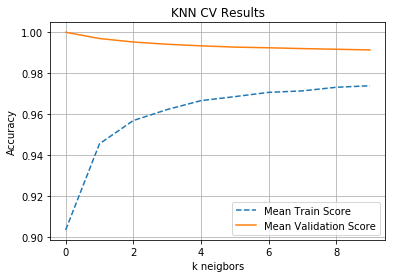

In [0]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('k neigbors')
plt.ylabel('Accuracy')
plt.title('KNN CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

## LOGISTIC REGRESSION
Logistic Regression works with binary data, where either there is a BUZZ (1) or not (0).
This model is based on the probability of an event occurring.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

param_grid = {'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best Params : {}".format(grid_search.best_params_))
print("Best cross validation score : {}".format(grid_search.best_score_))

Best Params : {'C': 1, 'penalty': 'l1'}
Best cross validation score : 0.9882922365983859


In [0]:
log_best_params=str(grid_search.best_params_)
log_reg_acc_train = grid_search.best_estimator_.score(X_train, y_train)
log_reg_acc_test = grid_search.best_estimator_.score(X_test, y_test)
log_reg_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
log_reg_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Logistic Regression: Train Accuracy: %.4f'%log_reg_acc_train)
print('Logistic Regression: Test Accuracy: %.4f '%log_reg_acc_test)
print('Logistic Regression: Train roc_auc_score: %.4f'%log_reg_auc_train)
print('Logistic Regression: Test roc_auc_score: %.4f '%log_reg_auc_test)

Logistic Regression: Train Accuracy: 0.9529
Logistic Regression: Test Accuracy: 0.9535 
Logistic Regression: Train roc_auc_score: 0.9131
Logistic Regression: Test roc_auc_score: 0.9109 


,C,penalty
0,0.001,l1
1,0.001,l2
2,0.010,l1
3,0.010,l2
4,0.100,l1
5,0.100,l2
6,1.000,l1
7,1.000,l2
8,10.000,l1
9,10.000,l2


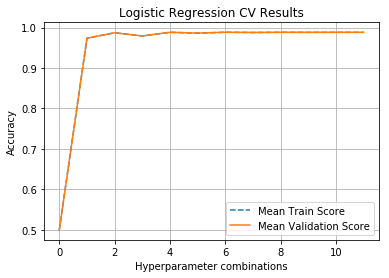

In [0]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

## SVC (LINEAR) KERNAL
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.

In [0]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.001}
Best cross validation score: 0.99


In [0]:
svmlin_best_params=str(grid_search.best_params_)
svmlin_acc_train = grid_search.best_estimator_.score(X_train, y_train)
svmlin_acc_test = grid_search.best_estimator_.score(X_test, y_test)
svmlin_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
svmlin_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Linear SVC - Train Accuracy: %.4f'%svmlin_acc_train)
print('Linear SVC - Test Accuracy: %.4f '%svmlin_acc_test)

print('Linear SVC - Train roc_auc_score: %.4f'%svmlin_auc_train)
print('Linear SVC - Test roc_auc_score: %.4f '%svmlin_auc_test)

Linear SVC - Train Accuracy: 0.8074
Linear SVC - Test Accuracy: 0.8096 
Linear SVC - Train roc_auc_score: 0.5204
Linear SVC - Test roc_auc_score: 0.5197 


,C
0,0.001
1,0.010
2,0.100
3,1.000
4,10.000
5,100.000


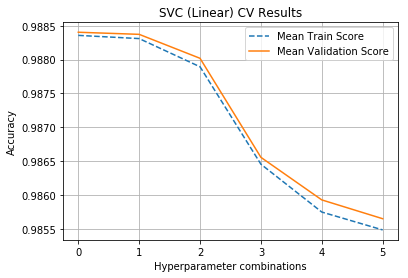

In [0]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title("SVC (Linear) CV Results")
pd.DataFrame(grid_search.cv_results_['params'])

## SVC (RADIAL BASIS FUNCTION) KERNAL

In [0]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.99


In [0]:
svmrbf_best_params=str(grid_search.best_params_)
svmrbf_acc_train = grid_search.best_estimator_.score(X_train, y_train)
svmrbf_acc_test = grid_search.best_estimator_.score(X_test, y_test)
svmrbf_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
svmrbf_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Linear SVC - Train Accuracy: %.4f'%svmrbf_acc_train)
print('Linear SVC - Test Accuracy: %.4f '%svmrbf_acc_test)

print('Linear SVC - Train roc_auc_score: %.4f'%svmrbf_auc_train)
print('Linear SVC - Test roc_auc_score: %.4f '%svmrbf_auc_test)

Linear SVC - Train Accuracy: 0.7992
Linear SVC - Test Accuracy: 0.8018 
Linear SVC - Train roc_auc_score: 0.5000
Linear SVC - Test roc_auc_score: 0.5000 


,C,gamma
0,0.001,0.001
1,0.001,0.010
2,0.001,0.100
3,0.001,1.000
4,0.001,10.000
5,0.001,100.000
6,0.010,0.001
7,0.010,0.010
8,0.010,0.100
9,0.010,1.000


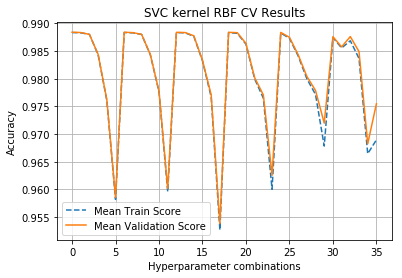

In [0]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('SVC kernel RBF CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

## SVC (POLYNOMIAL) KERNAL

In [0]:
#POLYNOMIAL KERNAL
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1,2,3,4]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]}
Best parameters: {'C': 0.01, 'degree': 1}
Best cross-validation score: 0.99


In [0]:
svmpoly_best_params=str(grid_search.best_params_)
svmpoly_acc_train = grid_search.best_estimator_.score(X_train, y_train)
svmpoly_acc_test = grid_search.best_estimator_.score(X_test, y_test)
svmpoly_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
svmpoly_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Polynomial SVC - Train Accuracy: %.4f'%svmpoly_acc_train)
print('Polynomial SVC - Test Accuracy: %.4f '%svmpoly_acc_test)

print('Polynomial SVC - Train roc_auc_score: %.4f'%svmpoly_auc_train)
print('Polynomial SVC - Test roc_auc_score: %.4f '%svmpoly_auc_test)

Polynomial SVC - Train Accuracy: 0.8109
Polynomial SVC - Test Accuracy: 0.8121 
Polynomial SVC - Train roc_auc_score: 0.5290
Polynomial SVC - Test roc_auc_score: 0.5260 


,C,degree
0,0.001,1
1,0.001,2
2,0.001,3
3,0.001,4
4,0.010,1
5,0.010,2
6,0.010,3
7,0.010,4
8,0.100,1
9,0.100,2


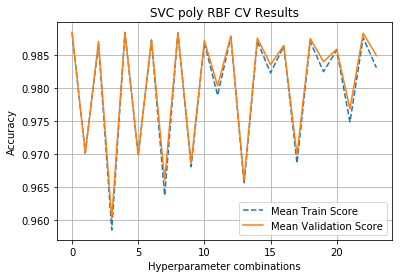

In [0]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('SVC poly RBF CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

## DECISION TREE CLASSIFIER

In [0]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid_search= GridSearchCV( DecisionTreeClassifier(random_state = 0),param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(grid_search.best_params_))
print("Best cross_val score : {}".format(grid_search.best_score_))

Best Parameters : {'max_depth': 5}
Best cross_val score : 0.9794832197066952


In [0]:
tree_best_params=str(grid_search.best_params_)
tree_acc_train = grid_search.best_estimator_.score(X_train, y_train)
tree_acc_test = grid_search.best_estimator_.score(X_test, y_test)
tree_auc_train = roc_auc_score(y_train,grid_search.predict(X_train))
tree_auc_test = roc_auc_score(y_test,grid_search.predict(X_test))

print('Decision Tree - Train Accuracy: %.4f'%tree_acc_train)
print('Decision Tree - Test Accuracy: %.4f '%tree_acc_test)

print('Decision Tree - Train roc_auc_score: %.4f'%tree_auc_train)
print('Decision Tree - Test roc_auc_score: %.4f '%tree_auc_test)

Decision Tree - Train Accuracy: 0.9575
Decision Tree - Test Accuracy: 0.9528 
Decision Tree - Train roc_auc_score: 0.9295
Decision Tree - Test roc_auc_score: 0.9172 


,max_depth
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


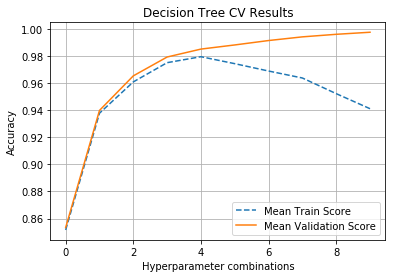

In [0]:
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search.cv_results_['mean_train_score'])), grid_search.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('Decision Tree CV Results')
pd.DataFrame(grid_search.cv_results_['params'])

## FINAL TABLE with Test & Train Scores

In [0]:
final_table=pd.DataFrame(
    {'Model':['KNN','Logistic','SVM Linear','SVM RBF','SVM Polynomial','Decision Tree'],
     'Parameters':[knn_best_params,log_best_params,svmlin_best_params,svmrbf_best_params,svmpoly_best_params,tree_best_params],
     'Train_Accuracy':[knn_acc_train,log_reg_acc_train,svmlin_acc_train,svmrbf_acc_train,svmpoly_acc_train,tree_acc_train],
     'Test Accuracy':[knn_acc_test,log_reg_acc_test,svmlin_acc_test,svmrbf_acc_test,svmpoly_acc_test,tree_acc_test],
     'ROC_AUC_Train':[knn_auc_train,log_reg_auc_train,svmlin_auc_train,svmrbf_auc_train,svmpoly_auc_train,tree_auc_train],
     'ROC_AUC_Test':[knn_auc_test,log_reg_auc_test,svmlin_auc_test,svmrbf_auc_test,svmpoly_auc_test,tree_auc_test]
                        })

final_table['score_diff']=final_table['ROC_AUC_Test']-final_table['ROC_AUC_Train']
final_table.sort_values(['ROC_AUC_Test'], ascending = False)

,Model,Parameters,Train_Accuracy,Test Accuracy,ROC_AUC_Train,ROC_AUC_Test,score_diff
5,Decision Tree,{'max_depth': 5},0.957534,0.952753,0.929533,0.917249,-0.012284
0,KNN,{'n_neighbors': 10},0.959488,0.952398,0.931087,0.915004,-0.016084
1,Logistic,"{'C': 1, 'penalty': 'l1'}",0.952914,0.953464,0.913059,0.910947,-0.002112
4,SVM Polynomial,"{'C': 0.01, 'degree': 1}",0.810856,0.812078,0.528982,0.525986,-0.002997
2,SVM Linear,{'C': 0.001},0.807392,0.809591,0.520354,0.519713,-0.000641
3,SVM RBF,"{'C': 0.001, 'gamma': 0.001}",0.799218,0.801776,0.500000,0.500000,0.000000


In [0]:
old_table=pd.DataFrame({'Model':['KNN','Logistic','SVM Linear','SVM RBF','SVM Polynomial','Decision Tree'],'ROC_AUC_Test':[0.923026,0.934122,0.932808,0.930209,0.912234,0.942063],'ROC_AUC_Train':[0.936309,0.935813,0.936604,0.934751,0.90707,0.950697],'Test_Accuracy':[0.957371,0.963766,0.9627,0.961634,0.954529,0.964121],'Train_Accuracy':[0.967395,0.966596,0.967306,0.966862,0.957001,0.970238],'Parameters':["{'n_neighbors': 10}","{'C': 10, 'penalty': 'l1'}","{'C': 100}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'degree': 1}","{'max_depth': 4}"]})
old_table['score_diff']=final_table['ROC_AUC_Test']-final_table['ROC_AUC_Train']
old_table.sort_values(['ROC_AUC_Test'], ascending = False)

,Model,ROC_AUC_Test,ROC_AUC_Train,Test_Accuracy,Train_Accuracy,Parameters,score_diff
5,Decision Tree,0.942063,0.950697,0.964121,0.970238,{'max_depth': 4},-0.012284
1,Logistic,0.934122,0.935813,0.963766,0.966596,"{'C': 10, 'penalty': 'l1'}",-0.002112
2,SVM Linear,0.932808,0.936604,0.962700,0.967306,{'C': 100},-0.000641
3,SVM RBF,0.930209,0.934751,0.961634,0.966862,"{'C': 100, 'gamma': 0.1}",0.000000
0,KNN,0.923026,0.936309,0.957371,0.967395,{'n_neighbors': 10},-0.016084
4,SVM Polynomial,0.912234,0.907070,0.954529,0.957001,"{'C': 100, 'degree': 1}",-0.002997


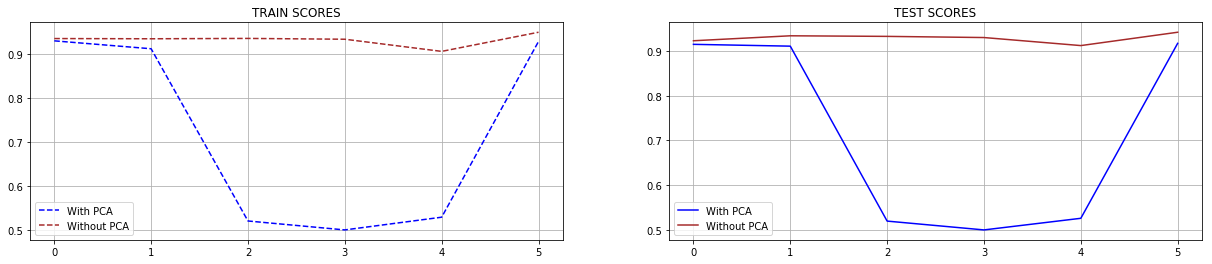

In [0]:
plt.figure(1,figsize= (21, 4))
plt.subplot(121)
plt.title('TRAIN SCORES')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['ROC_AUC_Train'], '--',c='blue', label = 'With PCA')
plt.plot(np.arange(0, len(old_table['Model'])), old_table['ROC_AUC_Train'], '--',c='brown', label = 'Without PCA')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title('TEST SCORES')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['ROC_AUC_Test'], '-', c='blue', label = 'With PCA')
plt.plot(np.arange(0, len(old_table['Model'])), old_table['ROC_AUC_Test'], '-', c='brown', label = 'Without PCA')
plt.legend()
plt.grid(True)

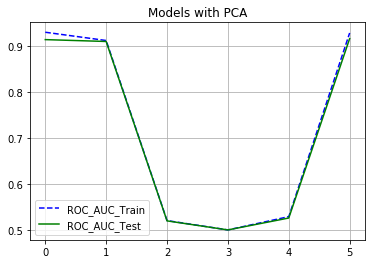

In [0]:
plt.title('Models with PCA')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['ROC_AUC_Train'], '--',c='blue', label = 'ROC_AUC_Train')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['ROC_AUC_Test'], '-', c='green', label = 'ROC_AUC_Test')
plt.legend()

plt.grid(True)

### After PCA, the overall model performances are worse.
###### We could see that the best overall model before and after PCA is Decision Tree

# Deep Learning Model

In [0]:

# This is formatted as code

from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(0)

In [0]:
# create model
nn_model_class = Sequential()
nn_model_class.add(Dense(12, input_dim=d, activation='relu'))
nn_model_class.add(Dense(8, activation='relu'))
nn_model_class.add(Dense(1, activation='sigmoid'))

In [0]:
# Compile model
nn_model_class.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Fit the model
nn_model_class.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
11256/11256 [==============================] - 2s 162us/step - loss: 0.2488 - acc: 0.9068
Epoch 2/150
11256/11256 [==============================] - 1s 103us/step - loss: 0.1223 - acc: 0.9516
Epoch 3/150
11256/11256 [==============================] - 1s 100us/step - loss: 0.1175 - acc: 0.9532
Epoch 4/150
11256/11256 [==============================] - 1s 99us/step - loss: 0.1159 - acc: 0.9549
Epoch 5/150
11256/11256 [==============================] - 1s 100us/step - loss: 0.1147 - acc: 0.9556
Epoch 6/150
11256/11256 [==============================] - 1s 98us/step - loss: 0.1134 - acc: 0.9556
Epoch 7/150
11256/11256 [==============================] - 1s 100us/step - loss: 0.1132 - acc: 0.9569
Epoch 8/150
11256/11256 [==============================] - 1s 98us/step - loss: 0.1120 - acc: 0.9557
Epoch 9/150
11256/11256 [==============================] - 1s 101us/step - loss: 0.1122 - acc: 0.9561
Epoch 10/150
11256/11256 [==============================] - 1s 100us/step - loss: 0.1

In [15]:
# Evaluate
score, acc = nn_model_class.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

2815/2815 [==============================] - 0s 55us/step
Test score: 0.11047134376211641
Test accuracy: 0.9559502597388747


In [16]:
# Predict
y_predict = nn_model_class.predict(X_test)
y_predict

array([[8.6380540e-05],
       [3.1042069e-01],
       [6.6980702e-04],
       ...,
       [1.5880278e-03],
       [1.4243339e-03],
       [4.1648874e-04]], dtype=float32)

### END